In [1]:
import sys
import os
import pandas as pd
import numpy as np
import pymc

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}/draft_pick_prob')

In [2]:
draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_draft_order.csv')


mock_draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_EP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_EP_22'})
mock_draft_df_2=pd.read_csv('2022_FC_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_FC_22'})
mock_draft_df_3=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_MH_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_MH_22'})
mock_draft_df_4=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_BM_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_BM_22'})
mock_draft_df_5=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_CB_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CB_22'})
mock_draft_df_6=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_DH_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_DH_22'})
mock_draft_df_7=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_DP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_DP_22'})
mock_draft_df_8=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_MP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_MP_22'})
mock_draft_df_9=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_PA_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PA_22'})
mock_draft_df_10=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_PL_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PL_22'})
mock_draft_df_11=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_RS_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_RS_22'})
mock_draft_df_12=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_SN_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SN_22'})
mock_draft_df_13=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_SS_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SS_22'})

possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')

In [3]:
draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_draft_order.csv')

file_list =['2022_EP_final_rankings.csv','2022_FC_final_rankings.csv','2022_MH_final_rankings.csv','2022_BM_final_rankings.csv','2022_CB_final_rankings.csv','2022_DH_final_rankings.csv','2022_DP_final_rankings.csv','2022_MP_final_rankings.csv','2022_PA_final_rankings.csv','2022_PL_final_rankings.csv','2022_RS_final_rankings.csv','2022_SN_final_rankings.csv','2022_SS_final_rankings.csv']

mock_draft_dfs = []

for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    # Check if 'RANK' increases by 1 each time
    is_consecutive = df['RANK'].diff() == 1
    
    # Use a mask to filter the DataFrame to keep only consecutive ranks
    df = df[is_consecutive]
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    df = df.rename(columns={'RANK': f'RANK_{prefix}_22'})
    
    mock_draft_dfs.append(df)  # Add the processed DataFrame to the list



possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')


In [4]:
import math
df_player_rankings=possible_players[['PLAYER_ID']].merge(mock_draft_dfs[0][['PLAYER_ID','RANK_EP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[1][['PLAYER_ID','RANK_FC_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[2][['PLAYER_ID','RANK_MH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','RANK_BM_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','RANK_CB_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','RANK_DH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','RANK_DP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','RANK_MP_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[8][['PLAYER_ID','RANK_PA_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[9][['PLAYER_ID','RANK_PL_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[10][['PLAYER_ID','RANK_RS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[11][['PLAYER_ID','RANK_SN_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[12][['PLAYER_ID','RANK_SS_22']], how='left', on=['PLAYER_ID'])
'''
df_player_rankings=df_player_rankings.merge(mock_draft_df_14[['PLAYER_ID','RANK_PRONMAN_JUNE_21']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_15[['PLAYER_ID','RANK_WHEELER_JUNE_27']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_16[['PLAYER_ID','RANK_WHEELER_JUNE_13']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_17[['PLAYER_ID','RANK_STAFF_JUNE_14']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_18[['PLAYER_ID','RANK_PRONMAN_MAY_8']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_19[['PLAYER_ID','RANK_WHEELER_MAY_10']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_20[['PLAYER_ID','RANK_PRONMAN_MAY_11']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_df_21[['PLAYER_ID','RANK_PRONMAN_MAY_30']], how='left', on=['PLAYER_ID'])
'''
df_player_rankings

,PLAYER_ID,RANK_EP_22,RANK_FC_22,RANK_MH_22,RANK_BM_22,RANK_CB_22,RANK_DH_22,RANK_DP_22,RANK_MP_22,RANK_PA_22,RANK_PL_22,RANK_RS_22,RANK_SN_22,RANK_SS_22
0,1,3.0,3.0,3.0,NaN,2.0,4.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0
1,2,6.0,4.0,4.0,4.0,5.0,6.0,5.0,6.0,4.0,5.0,3.0,4.0,9.0
2,3,4.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
3,4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11.0,6.0,13.0,5.0,7.0,11.0,9.0,21.0,5.0,19.0,7.0,7.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll=1
    columns_to_go_through=df.columns[1:]
    for i in columns_to_go_through:
        max=df[i].max()+1
        player_rank=list(df[i])
        fixed_player_rank=[max if math.isnan(x) else x for x in player_rank]
        neg_ll-=likelihood(params, fixed_player_rank)
    return neg_ll

In [6]:
def constraint_eq(x):
    return sum(x)

In [7]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 19.88419328  23.40671157  25.17989877  14.7501462   21.65977336
  22.16897859  21.10189506  20.4685334   22.22669242  21.16615937
  20.15887134  20.22575067  21.49725436  19.17346086  21.91339487
  19.9125595   22.05103121  17.95140847  20.48840783  19.98173289
  18.89920247  18.52419349  19.35456936  21.00328941  16.86621137
  18.34970531  16.98444782  19.68631085  17.24624598  20.2094809
  19.5866643   15.53386756  18.49529371  15.93580239  18.92183728
  15.99587955  17.92513352  15.39155568   2.74158219   2.7538836
   2.76529774  16.9851648   17.33946182  17.70266337  17.86204295
  17.96231608   2.8678144   15.42988202  16.71731477   3.07674964
  17.15400403   3.22927957  18.22480492  16.17325823  16.63653689
   3.40167247  14.72374417   3.12778181   2.79002036  18.00626649
  18.05812029  18.26260037   0.17077744  -0.53171762  18.41776679
  -1.6530773   -1.85537961  17.56581002  16.18907953  -1.28326857
  17.52232845  -0.30895396   0.30771928   0.8492258   15.50810175
   1.9203284

In [9]:
player_ability_parameters_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df['SIM_RANK'] = range(1, len(player_ability_parameters_df) + 1)
player_ability_parameters_df.head(10)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS,SIM_RANK
2,Logan Cooley,3,25.179899,1
1,Simon Nemec,2,23.406712,2
8,Matthew Savoie,9,22.226692,3
5,David Jiricek,6,22.168979,4
16,Joakim Kemell,17,22.051031,5
14,Jonathan Lekkerimäki,15,21.913395,6
4,Cutter Gauthier,5,21.659773,7
12,Frank Nazar,13,21.497254,8
9,Pavel Mintyukov,10,21.166159,9
6,Kevin Korchinski,7,21.101895,10


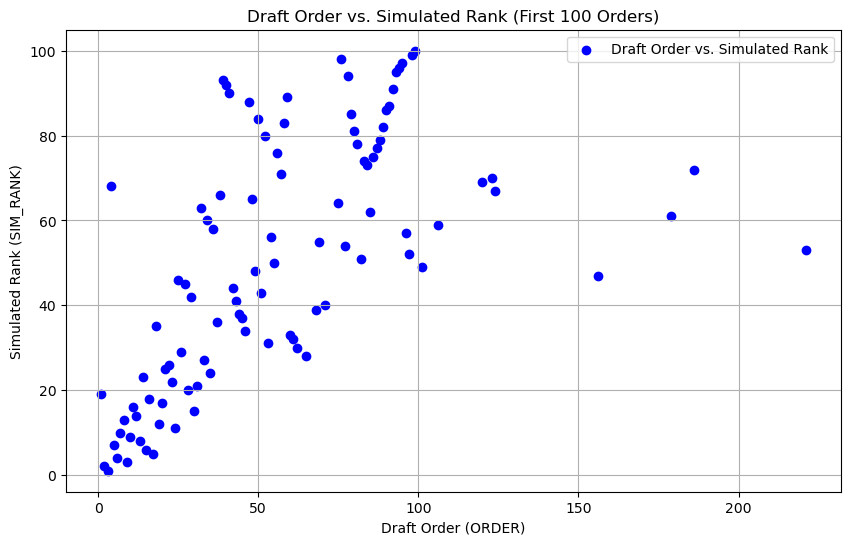

In [11]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')

# Filter the data for the first 100 orders
merged_df_first_100 = merged_df.head(100)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_first_100['ORDER'], merged_df_first_100['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Draft Order (ORDER)')
plt.ylabel('Simulated Rank (SIM_RANK)')
plt.title('Draft Order vs. Simulated Rank (First 100 Orders)')
plt.grid(True)
plt.legend()

plt.show()


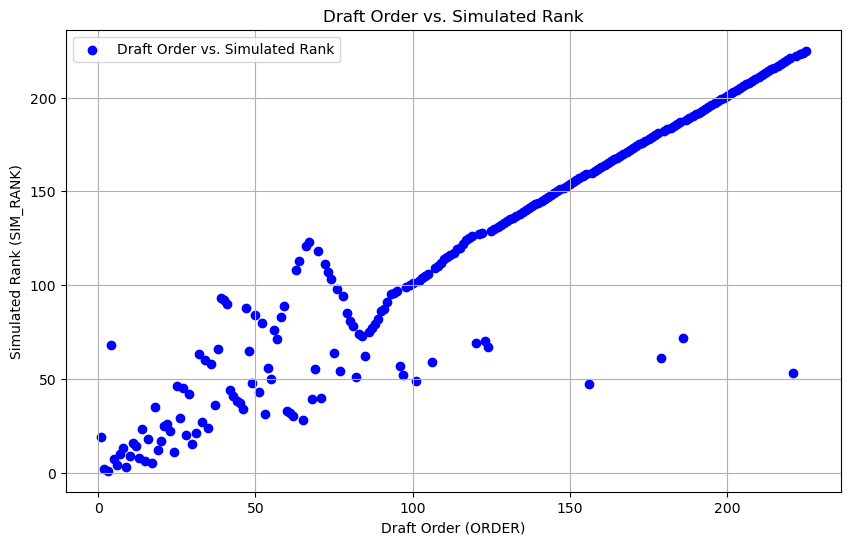

In [10]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['ORDER'], merged_df['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Draft Order (ORDER)')
plt.ylabel('Simulated Rank (SIM_RANK)')
plt.title('Draft Order vs. Simulated Rank')
plt.grid(True)
plt.legend()

plt.show()
